# Load and Inspect the Dataset

In [5]:
import pandas as pd

df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

print("Dataset info:")
print(df.info())
print("\nMissing values per column:")
print(df.isna().sum())

print("\nFirst 5 rows:")
print(df.head())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_dise

# Preprocessing

In [6]:

df = df.drop('id', axis=1)


df['bmi'] = df['bmi'].fillna(df['bmi'].median())

X = df.drop('stroke', axis=1)
y = df['stroke']


X = pd.get_dummies(X, drop_first=True)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Preprocessing done.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Preprocessing done.
X_train shape: (3577, 16)
X_test shape: (1533, 16)


# Model Training and Evaluation

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


=== Logistic Regression ===
Accuracy: 0.9517286366601435
ROC-AUC: 0.8378417924096937
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       1.00      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.98      0.51      0.50      1533
weighted avg       0.95      0.95      0.93      1533

=== Random Forest ===
Accuracy: 0.9510763209393346
ROC-AUC: 0.8107178783721993
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.50      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # optional
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

# Fit models
lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))
print(classification_report(y_test, y_pred_lr))

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))
print(classification_report(y_test, y_pred_rf))




=== Logistic Regression ===
Accuracy: 0.731245923026745
ROC-AUC: 0.8389849108367627
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1458
           1       0.13      0.79      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.76      0.53      1533
weighted avg       0.94      0.73      0.81      1533

=== Random Forest ===
Accuracy: 0.9510763209393346
ROC-AUC: 0.8249108367626887
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Data Balancing

In [9]:
print(df['stroke'].value_counts())
print(df['stroke'].value_counts(normalize=True))


stroke
0    4861
1     249
Name: count, dtype: int64
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print(pd.Series(y_train_bal).value_counts())


stroke
0    3403
1    3403
Name: count, dtype: int64


# Retrain Models on Balanced Data

In [11]:
# Logistic Regression
lr_bal = LogisticRegression(max_iter=1000, random_state=42)
lr_bal.fit(X_train_bal, y_train_bal)
y_pred_lr_bal = lr_bal.predict(X_test_scaled)

# Random Forest
rf_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_rf_bal = rf_bal.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("=== Logistic Regression (Balanced) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_bal))
print("ROC-AUC:", roc_auc_score(y_test, lr_bal.predict_proba(X_test_scaled)[:,1]))
print(classification_report(y_test, y_pred_lr_bal))

print("=== Random Forest (Balanced) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_bal))
print("ROC-AUC:", roc_auc_score(y_test, rf_bal.predict_proba(X_test_scaled)[:,1]))
print(classification_report(y_test, y_pred_rf_bal))


=== Logistic Regression (Balanced) ===
Accuracy: 0.7292889758643183
ROC-AUC: 0.8340923639689072
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1458
           1       0.13      0.77      0.22        75

    accuracy                           0.73      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.94      0.73      0.81      1533

=== Random Forest (Balanced) ===
Accuracy: 0.9060665362035225
ROC-AUC: 0.7605395518975766
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1458
           1       0.14      0.17      0.15        75

    accuracy                           0.91      1533
   macro avg       0.55      0.56      0.55      1533
weighted avg       0.92      0.91      0.91      1533



# SHAP

/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


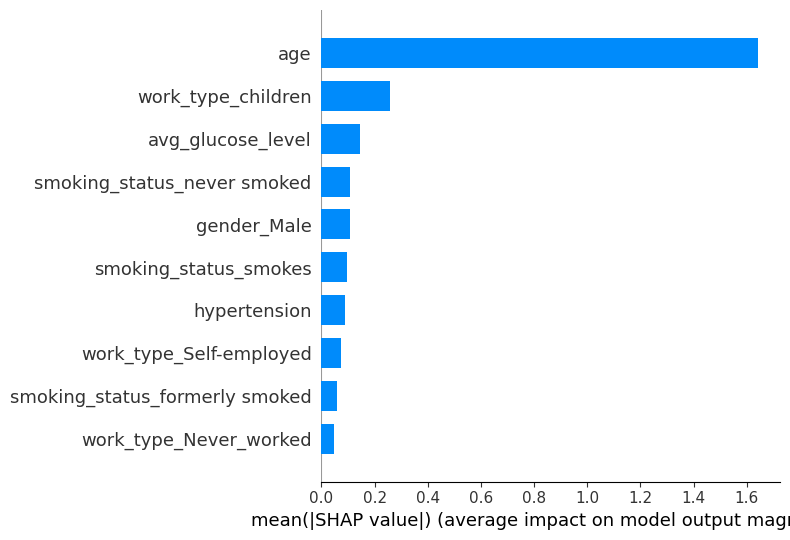

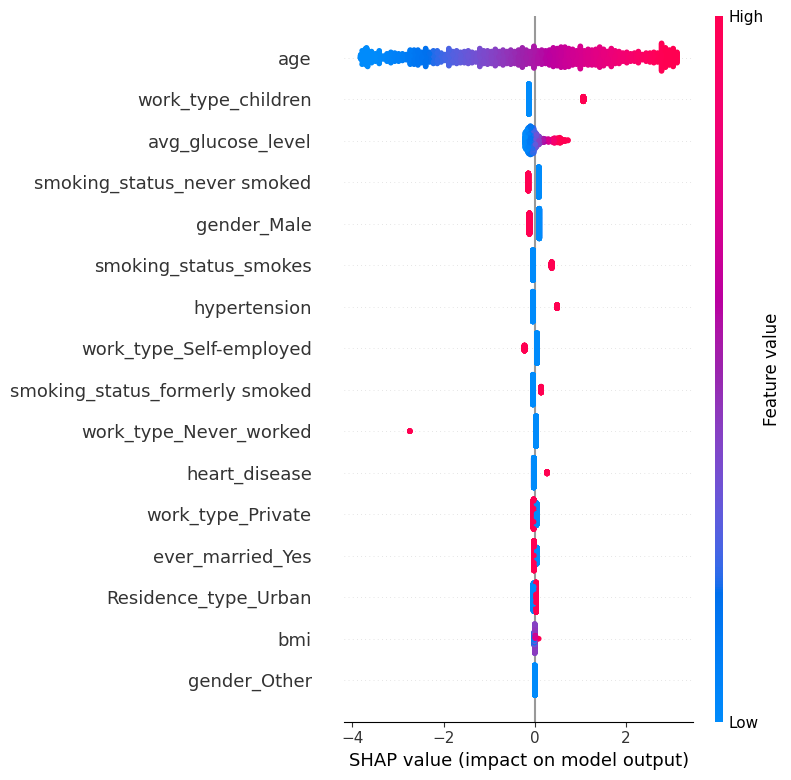

In [14]:
import shap


explainer = shap.LinearExplainer(lr, X_train_scaled, feature_perturbation="interventional")


shap_values = explainer.shap_values(X_test_scaled)


shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=X_test.columns,
    plot_type="bar",
    max_display=10
)


shap.summary_plot(
    shap_values,
    X_test_scaled,
    feature_names=X_test.columns
)





/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


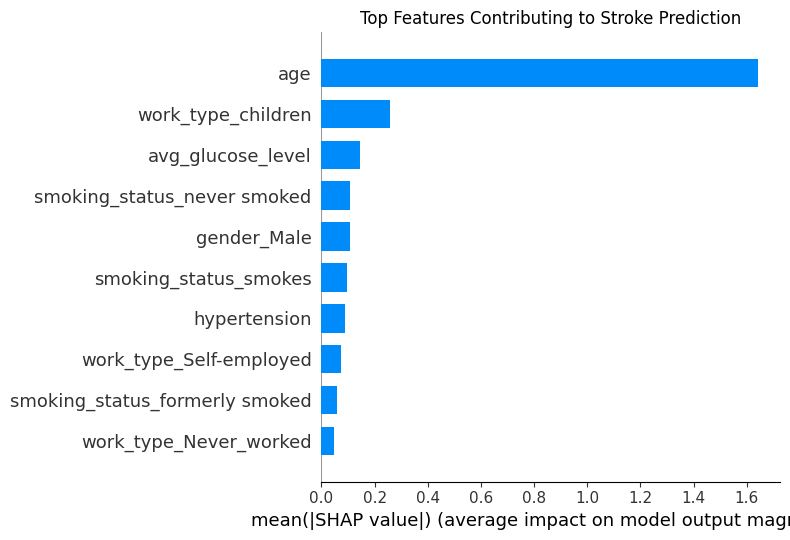

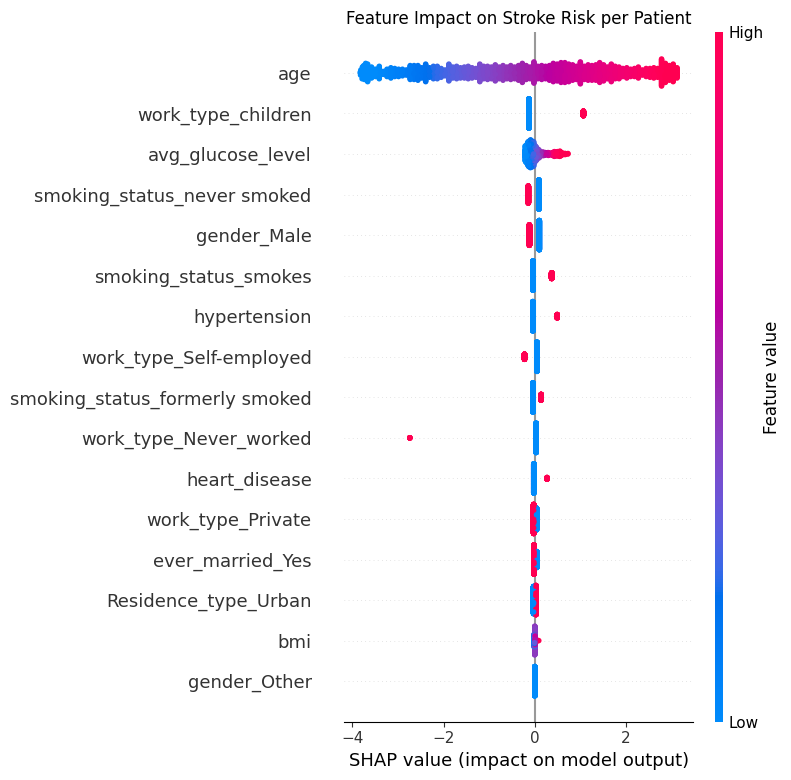

In [17]:
import shap
import matplotlib.pyplot as plt


explainer = shap.LinearExplainer(lr, X_train_scaled, feature_perturbation="interventional")


shap_values = explainer.shap_values(X_test_scaled)


X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


plt.title("Top Features Contributing to Stroke Prediction")
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    feature_names=X_test_scaled_df.columns,
    plot_type="bar",
    max_display=10,
    color_bar=True
)


plt.title("Feature Impact on Stroke Risk per Patient")
shap.summary_plot(
    shap_values,
    X_test_scaled_df,
    feature_names=X_test_scaled_df.columns
)



## Summary of Stroke Prediction Analysis


**Dataset:** Brain Stroke Dataset (~5,110 patients)  
**Target:** `stroke` (0 = no stroke, 1 = stroke)  

**Preprocessing:**  
- Imputed missing values for `bmi`  
- Encoded categorical variables  
- Train-test split and feature scaling  

**Modeling & Evaluation:**  
- Logistic Regression (balanced): Accuracy ~73%, ROC-AUC ~0.83, recall for stroke ~77%  
- Random Forest (balanced): Accuracy ~91%, ROC-AUC ~0.76, recall for stroke ~17%  
- Balancing necessary due to class imbalance  

**Insights:**  
- Age, average glucose level, hypertension, heart disease, and BMI are the strongest predictors  
- Lifestyle and demographic features have smaller impact  

**Conclusion:**  
- Machine learning models can identify patterns associated with stroke risk  
- Feature importance analysis provides interpretable insights for biomedical applications  